## **by GROUP 24**
### Viktor Smirnov - viktor.smirnov@mail.mcgill.ca
### Saif Shahin - saif.shahin@mail.mcgill.ca


# ECSE552 - W23 - Homework 2
Released: 10 February 2023 @ 13:00

Due: 23 February 2023 @ 23:59

Last Modified: 12 February 2023 @ 20:00

For questions regarding this assignment, please contact:
- Part 1 & 2: joseph.szymborski@mail.mcgill.ca
- Part 3: amin.emad@mcgill.ca

## Part 1 - Data Augmentation (36 pts)

---



In Tutorial 4, a Twin neural network architecture was used to test if two images matched.

Data Augementation is a method by which data inputted to a model is altered in ways that *don't change the label* of the category so that the model might *learn from more diverse samples*. This is often done to avoid overfitting and creating fragile models.

PyTorch offers a simple way to apply transformations to [`torchvision`](https://pytorch.org/vision/0.8/) datasets using the `transform` argument of datasets in the [`torchvision.datasets`](https://pytorch.org/vision/0.8/datasets.html) module. An example of this is available in Tutorial 3.

You are tasked with the following:


### Q1.1: Choosing Transformations (9 pts)

Please **list at least 3 transformations** that would be applicable to the Twin neural network *as applied to the digit matching task* from Tutorial 3.

Please also give a **very brief (~1-2 sentence) explanation** as to what sort of variance each transformation will introduce to the data, and why that might be favorable.

Assure that at least one of the listed transformations are implemented by the [`torchvision.transforms`](https://pytorch.org/docs/stable/torchvision/transforms.html) [API](https://www.howtogeek.com/343877/what-is-an-api/). You can do this by simply reading function names and descriptions there and cross-referencing with your list. 


**1. Transformation 1:**
Squeezing and offset in X/Y axis. This is primarily to account for inputs not nessessarily centered in the image.

**2. Transformation 2:**
Rotation around X,Y,Z axis. In an image, this could represent characters placed on a surface affected by perspective or if camera was rotated around its own Z axis.

**3. Transformation 3:**
Skewing, to represent different types of writing (different people tend to write at different hand position which results in differently angled cursive writing).


### Q1.2 Implementing Custom Transformations (17 pts)

It would be helpful to add pixel-level noise to the digit samples, but the [`torchvision.transforms`](https://pytorch.org/docs/stable/torchvision/transforms.html) API does not have such a transform.

**Implement your own noise transform using the template code below.**

#### Hints

You can add random noise however you like, but assure that letters in the images are still legible (*i.e.:* the signal-to-noise ratio is still high). You can eye-ball it, just use a small conservatively small value if you are concerned.

Below are some images of how your noise might look. In this example, the amount of noise is added with a random probability, and the amount of noise added is capped at some level to assure legibility.

(You can alternatively add random noise with consistant probability)

![Noise applied to the USPS digits set](https://s3.ca-central-1.wasabisys.com/dl.szymborski.ca/ecse552/W23/H2/usps_noise.webp)

![Noise applied to the MNIST digits set](https://s3.ca-central-1.wasabisys.com/dl.szymborski.ca/ecse552/W23/H2/mnist_noise.webp)

In [ ]:
import random


random.seed(10)


class AddNoise(object):
    def __init__(self,
                 # you can add parameters here
                 max_magnitude=1.0
                 ):
        
        # you can store variables in the object (we call them "properties")
        # here, I'm storing the integer 8675309 to a variable named jenny
        self.max_magnitude = max_magnitude

    def __call__(self, tensor):
        # this function is called on each transform
        # the tensor parameter is the sample to be transformed
        # `tensor` is a matrix which represents the image with values from 0-1
        # Your task is to add random values to `tensor`. 
        # Hint: Generate a random matrix with the same size as `tensor` and add
        # it to `tensor`

        # you can use properties of your object you defined in __init__

        magnitude = random.uniform(0, self.max_magnitude

        # Add uniform noise to the tensor, send it to the device of the original
        #   input tensor       
        return (tensor + magnitude * torch.rand(tensor.shape)).to(tensor.device)
    
    def __repr__(self):
        # you can ignore this if you like
        # return here a string representation of your transform
        # you can include parameters in it should you like
        # this one just returns the class name
        return self.__class__.__name__ + f'mean={self.mean} : magitude={self.magnitude}'

### Q1.3 Applying the Transformations (5 pts)

**Define an instance of [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)** for both the USPS and MNIST datasets, much like was done in Tutorial 4. You may reuse the code from there.

Just like in Tutorial 3, name those instances of Dataset: `usps_trainset`, `usps_testset`, `mnist_trainset`, `mnist_testset` according to whether they belong to MNIST or USPS, and if they are training or test splits.

Also, just like in Tutorial 3, name a variable `transform` and use [`torchvision.transforms.Compose`](https://pytorch.org/vision/0.8/transforms.html#torchvision.transforms.Compose) to **compose the following transformations:**

1. At least one transformation you listed in Q1.1
2. The AddNoise transformation from Q1.2

**Apply the transformations to all four Datasets** (*i.e.*: the Datasets for `usps_trainset`, `usps_testset`, `mnist_trainset`, `mnist_testset`).

Take particular care that the transformations you are choosing are applicable to the task of matching digits. For example, a transformation that would randomly add black boxes to the images might cover the lower half of a 3, which would make it ambiguosly a 2 or a 3.



In [ ]:
# Q1.3 code here


from torchvision import datasets
import torchvision.transforms as transforms
import torch
import numpy as np


transform = transforms.Compose([transforms.ToTensor(),
                                transforms.RandomPerspective(),
                                transforms.RandomRotation(degrees=50),
                                AddNoise(max_magnitude=0.7)])


usps_trainset  = datasets.USPS(  root='./data', train=True,  download=True, transform=transform)
usps_testset   = datasets.USPS(  root='./data', train=False, download=True, transform=transform)
mnist_trainset = datasets.MNIST( root='./data', train=True,  download=True, transform=transform)
mnist_testset  = datasets.MNIST( root='./data', train=False, download=True, transform=transform)

  0%|          | 0/6579383 [00:00<?, ?it/s]

  0%|          | 0/1831726 [00:00<?, ?it/s]

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### Q1.4 Visualising the Tranformations (5 pts)

From your newly augmented datasets, **plot 3 images from the MNIST and USPS** (for a total of 6 images) along with the digit number (*e.g.:* in the plot title, as done in Tutorial 4).

You can certainly recycle code from Tutorial 4.

	Printing USPS Trainset
--------------------------------------


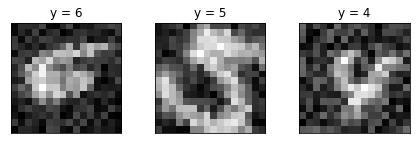

	Printing MNIST Trainset
---------------------------------------


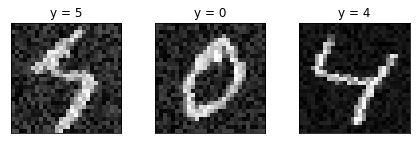

In [ ]:
# Q1.4 code here


import matplotlib.pyplot as plt


# USPS
print('\tPrinting USPS Trainset' + '\n' + '-'*38)
fig = plt.figure(figsize=(6,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.tight_layout()
    plt.imshow(usps_trainset[i][0].reshape(16,16), cmap='gray', interpolation='none')
    plt.title("y = {}".format(usps_trainset[i][1]))
    plt.xticks([])
    plt.yticks([])

plt.show()


# MNIST
print('\tPrinting MNIST Trainset' + '\n' + '-'*39)
fig = plt.figure(figsize=(6,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.tight_layout()
    plt.imshow(mnist_trainset[i][0].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("y = {}".format(mnist_trainset[i][1]))
    plt.xticks([])
    plt.yticks([])

plt.show()

## Part 2 - Dropout (14 pts)


---


### Q2.1 Illustrating Dropout (5 pts)

Prepare 1000 samples of size 120 (*i.e.:* $x = \mathbb{R}^{1000\times 120}$). Values can be randomly sampled or all ones; just so long as they are non-zero.

Apply a "dropout" with a 25% chance of zeroing out an input value to your random sample using [`torch.nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout).

Finally, calculate the average percentage of elements that are equal to zero in each sample and confirm that it is approximately 25%.



In [ ]:
# Q2.1 code here


import torch


input = torch.ones([1000, 120])

dropout = torch.nn.Dropout(p=0.25)

output = dropout(input)

count = torch.count_nonzero(output)

ratio = (1.0 - count/(1000 * 120)) * 100


print(f'The radio of zero elements is {ratio:.2f}%')

The radio of zero elements is 24.96%


### Q2.2 Train with Dropout and Data Augmentation (9 pts)

Change the code below to include at least one Dropout with $p=0.1$.

Add as many dropout layers as you see fit between layers that are, in your estimation, the most relevant.

Then, use the cell after the next one to run your dropout network and a network without dropout. The cell after that will plot out the Loss and AUC for both models.

*N.B.*: Don't overthink the number of dropout layers or their placement. There is more than one correct answer and we're primarily looking an understanding of the purpose of including dropout layers and how it's acheived (*i.e.*: to combat overfitting from overparameterization by zeroing out random elements of the output of layers with many parameters).

In [ ]:
# This is the neural network architecture
# ** This is the code cell you are meant edit to add dropout **
# More specifically, the `__init__` and `forward` methods

!pip install pytorch-lightning
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
import sklearn.metrics as metrics

class MatchingNetworkWithDropout(pl.LightningModule):
    def __init__(self, mnist_in, usps_in):
        # (Optionally) EDIT ME 
        super(MatchingNetworkWithDropout, self).__init__()
        self.layer1_mnist = nn.Linear(mnist_in, 128)
        self.layer1_usps = nn.Linear(usps_in, 128)
        self.dropout1 = torch.nn.Dropout(p=0.1)

        self.layer2 = nn.Linear(128, 64) # shared between the mnist and usps track
        self.dropout2 = torch.nn.Dropout(p=0.1)

        self.layer3 = nn.Linear(64, 32) # shared between the mnist and usps track
        self.dropout3 = torch.nn.Dropout(p=0.1)

        self.loss_func = nn.CosineEmbeddingLoss(reduction='sum')
    
    def forward(self, x1, x2):
        # EDIT ME
        x1 = F.relu(self.dropout1(self.layer1_mnist(x1)))
        x1 = F.relu(self.dropout2(self.layer2(x1)))
        x1 = torch.tanh(self.dropout3(self.layer3(x1)))
        
        x2 = F.relu(self.dropout1(self.layer1_usps(x2)))
        x2 = F.relu(self.dropout2(self.layer2(x2)))
        x2 = torch.tanh(self.dropout3(self.layer3(x2)))
        return x1, x2


    def step(self, batch, batch_idx, log_prefix):
      (mnist_data, usps_data), (mnist_y, usps_y) = batch
      mnist_data = mnist_data.flatten(start_dim=1)
      usps_data = usps_data.flatten(start_dim=1)
      mnist_embedding, usps_embedding = self(mnist_data, usps_data)

      y = (mnist_y == usps_y) * 2 - 1

      loss = self.loss_func(mnist_embedding, usps_embedding, y)

      self.log(log_prefix + "loss", loss, on_step=False, on_epoch=True)

      y_hat = torch.round(F.cosine_similarity(mnist_embedding, usps_embedding))

      fpr, tpr, thresholds = metrics.roc_curve(y.cpu(), y_hat.cpu().detach().reshape(-1))
      auc = metrics.auc(fpr, tpr)

      self.log(log_prefix + "auc", auc, on_step=False, on_epoch=True, prog_bar=True)
      
      return loss

    def training_step(self, batch, batch_idx):
      return self.step(batch, batch_idx, 'training_')

    def validation_step(self, batch, batch_idx):
      return self.step(batch, batch_idx, 'val_')

    def configure_optimizers(self):
      return torch.optim.Adam(self.parameters(), lr=1e-3)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.2/826.2 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 21.9 MB/s eta 0:00:00


In [ ]:
from torch.utils.data import Dataset


class MatchingNetworkNoDropout(pl.LightningModule):
    def __init__(self, mnist_in, usps_in):
        super(MatchingNetworkNoDropout, self).__init__()
        self.layer1_mnist = nn.Linear(mnist_in, 128)
        self.layer1_usps = nn.Linear(usps_in, 128)
        
        self.layer2 = nn.Linear(128, 64) # shared between the mnist and usps track
        self.layer3 = nn.Linear(64, 32) # shared between the mnist and usps track
        
        self.loss_func = nn.CosineEmbeddingLoss(reduction='sum')
    
    def forward(self, x1, x2):
        x1 = F.relu(self.layer1_mnist(x1))
        x1 = F.relu(self.layer2(x1))
        x1 = torch.tanh(self.layer3(x1))
        
        x2 = F.relu(self.layer1_usps(x2))
        x2 = F.relu(self.layer2(x2))
        x2 = torch.tanh(self.layer3(x2))
        return x1, x2


    def step(self, batch, batch_idx, log_prefix):
      (mnist_data, usps_data), (mnist_y, usps_y) = batch
      mnist_data = mnist_data.flatten(start_dim=1)
      usps_data = usps_data.flatten(start_dim=1)
      mnist_embedding, usps_embedding = self(mnist_data, usps_data)

      y = (mnist_y == usps_y) * 2 - 1

      loss = self.loss_func(mnist_embedding, usps_embedding, y)

      self.log(log_prefix + "loss", loss, on_step=False, on_epoch=True)

      y_hat = torch.round(F.cosine_similarity(mnist_embedding, usps_embedding))

      fpr, tpr, thresholds = metrics.roc_curve(y.cpu(), y_hat.cpu().detach().reshape(-1))
      auc = metrics.auc(fpr, tpr)

      self.log(log_prefix + "auc", auc, on_step=False, on_epoch=True, prog_bar=True)
      
      return loss

    def training_step(self, batch, batch_idx):
      return self.step(batch, batch_idx, 'training_')

    def validation_step(self, batch, batch_idx):
      return self.step(batch, batch_idx, 'val_')

    def configure_optimizers(self):
      return torch.optim.Adam(self.parameters(), lr=1e-3)

class PairedDataset(Dataset):

  def __init__(self, mnist_dataset, usps_dataset):
    self.mnist_dataset = mnist_dataset
    self.usps_dataset = usps_dataset


  def __len__(self):
    return min(len(self.mnist_dataset), len(self.usps_dataset))

  def __getitem__(self, idx):
    
    mnist_data, mnist_y = self.mnist_dataset[idx]
    usps_data, usps_y = self.usps_dataset[idx]

    return (mnist_data, usps_data), (mnist_y, usps_y)


pdset_train = PairedDataset(mnist_trainset, usps_trainset)
pdset_train_loader = torch.utils.data.DataLoader(pdset_train, batch_size=128)

pdset_test = PairedDataset(mnist_testset, usps_testset)
pdset_test_loader = torch.utils.data.DataLoader(pdset_test, batch_size=128)

!curl -O https://gist.githubusercontent.com/jszym/479db2af32411b64249bfb1bff43a95e/raw/dictlogger.py
from dictlogger import DictLogger

model_dropout = MatchingNetworkWithDropout(28*28, 16*16)
model_no_dropout = MatchingNetworkNoDropout(28*28, 16*16)

logger_dropout = DictLogger()
logger_no_dropout = DictLogger()

num_epochs = 50

trainer = pl.Trainer(max_epochs=num_epochs,
                     accelerator='gpu', devices=1,
                     logger=logger_dropout
                     )

trainer.fit(model_dropout, pdset_train_loader, pdset_test_loader)

trainer = pl.Trainer(max_epochs=num_epochs,
                     accelerator='gpu', devices=1,
                     logger=logger_no_dropout
                     )

trainer.fit(model_no_dropout, pdset_train_loader, pdset_test_loader)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1610  100  1610    0     0   5143      0 --:--:-- --:--:-- --:--:--  5127


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type                | Params
-----------------------------------------------------
0 | layer1_mnist | Linear              | 100 K 
1 | layer1_usps  | Linear              | 32.9 K
2 | dropout1     | Dropout             | 0     
3 | layer2       | Linear              | 8.3 K 
4 | dropout2     | Dropout             | 0     
5 | layer3       | Linear              | 2.1 K 
6 | dropout3     | Dropout             | 0     
7 | loss_func    | CosineEmbeddingLoss | 0     
-----------------------------------------------------
143 K

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:613: UserWarning: Checkpoint directory /content/DictLogger/0.1/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type                | Params
-----------------------------------------------------
0 | layer1_mnist | Linear              | 100 K 
1 | layer1_usps  | Linear              |

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


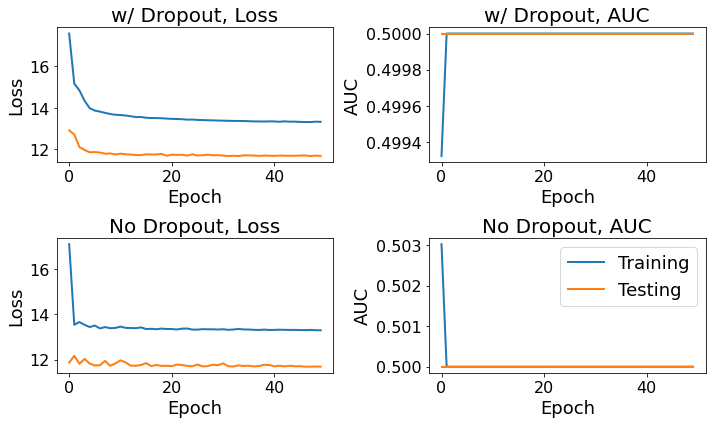

In [ ]:
# This cell plots the Loss and AUC of the models with and without dropout

parameters = {'axes.labelsize': 18, 'legend.fontsize': 18, 'xtick.labelsize':16,
              'ytick.labelsize':16, 'axes.titlesize': 20}
plt.rcParams.update(parameters)

fig, axs = plt.subplots(2,2, figsize=(10, 6))

axs[0,0].plot(range(num_epochs), logger_dropout.metrics['training_loss'], lw=2, label='Training')
axs[0,0].plot(range(num_epochs), logger_dropout.metrics['val_loss'], lw=2, label='Testing')
axs[0,0].set_xlabel('Epoch')
axs[0,0].set_ylabel('Loss')
axs[0,0].set_title('w/ Dropout, Loss')

axs[0,1].plot(range(num_epochs), logger_dropout.metrics['training_auc'], lw=2, label='Training')
axs[0,1].plot(range(num_epochs), logger_dropout.metrics['val_auc'], lw=2, label='Testing')
axs[0,1].set_xlabel('Epoch')
axs[0,1].set_ylabel('AUC')
axs[0,1].set_title('w/ Dropout, AUC')

axs[1,0].plot(range(num_epochs), logger_no_dropout.metrics['training_loss'], lw=2, label='Training')
axs[1,0].plot(range(num_epochs), logger_no_dropout.metrics['val_loss'], lw=2, label='Testing')
axs[1,0].set_xlabel('Epoch')
axs[1,0].set_ylabel('Loss')
axs[1,0].set_title('No Dropout, Loss')

axs[1,1].plot(range(num_epochs), logger_no_dropout.metrics['training_auc'], lw=2, label='Training')
axs[1,1].plot(range(num_epochs), logger_no_dropout.metrics['val_auc'], lw=2, label='Testing')
axs[1,1].set_xlabel('Epoch')
axs[1,1].set_ylabel('AUC')
axs[1,1].set_title('No Dropout, AUC')

plt.legend()
plt.tight_layout()
plt.show()

**NOTE1: The number of epochs was changed from 200 to 50 with TA's permission as the vanishing gradient causes one of the activation functions to produce a NaN which results in training failure**

**NOTE2: Due to random nature of dropout, it is feasible that the NaN error will occur even with 50 Epochs, if this happens, just reduce the number of epochs (10 or 20 work the best).**

## Part 3 - Theoretical Questions (50 pts)

### Question 3.1 (25 pts)

In the class we saw that using quadratic approximation of cost function in the neighborhood of unregularized cost function ($w^*$), the solution of the L2 regularized cost (assuming that there are no biases) is equal to

$$
\tilde{w} = \left(Q\Lambda Q^\textrm{T} + \alpha I\right)^{-1}Q\Lambda Q^\textrm{T}w^*
$$

$$
= \left[Q(\Lambda + \alpha I)Q^\textrm{T}\right]Q\Lambda Q^\textrm{T}w^*
$$

$$
= Q(\Lambda + \alpha I)^{-1} \Lambda Q^\textrm{T}w^*
$$

In these equations, $Q$ is the orthonormal matrix of eigenvector of the Hessian matrix $H$ of $J$ with respect to parameters $w$ evaluated at $w^*$ and $\Lambda$ is the diagonal matrix of its eigenvalues. Using a similar approximation, we want to evaluate under which condition early stopping and L2 regularization are equivalent.

Assume that we initialized the weights from origin and the learning rate $\epsilon$ is small enough such that $|1-\epsilon\lambda_i|<1$. Obtain an expression for $w^t$, the vector of parameters after $t$ iterations using gradient descent as a function of $H, w^*, \Lambda$ and $\epsilon$ (the learning rate). Hint: start by describing $w^t$ as a function of $w^{t-1}$ and solve this recursive formula based on the initial vector of weights. 

**Make sure that you clearly explain and justify each step (only writing down the final results is not sufficient).**

Now, compare the expression obtained for $w^t$ with the solution of the weights for L2 regularization in the equation above and find conditions (based on eigenvalues, coefficient of L2 regularization and the learning rate) that if satisfied make the two regularization methods equivalent.

# 3.1 Answer


> Let's start with the L2 regularized cost function:
> <br/><br/>
> $$J(w) = \frac{1}{2} (||Xw - y||^2 + 𝛼||w||^2)$$
> <br/>
> where:
> - $X$ is the feature matrix
> - $y$ is the target vector
> - $𝛼$ is the regularization parameter
> - $||. ||^2$ denotes the L2 norm
> 
> We can also attempt to describe the Jacobian using 2nd degree Taylor series in vectorized form (with $a$ is a real value):
> <br/><br/>
> $$ J(w) = J(a) + \frac{1}{1!} {∇_w}J(a) (w - a)  +  \frac{1}{2!} (w - a)^T {{∇_w}^{2}}J(a) (w - a)$$
> <br/>
> We now can:
> - Substitute $a$ for $w^{*}$, as we assume we are in the region where we obtain the minimal unregularized training cost, i.e. $w^{*}=argmin_wJ(w)$ that results in ${{∇_w}}J(w^{*}) = 0$
> - Use the symbol $θ$ as a placeholder variable used to represent the argument of the approximate cost function (similar to the procedure in the book).
> 
> ... to get the equation:
> <br/><br/>
> $$ \hat{J}(θ) = J(w^{*}) +  \frac{1}{2} (w - w^{*})^T {{∇_w}^{2}}J(w^{*}) (w - w^{*})$$
> <br/>
> ... where ${∇_w}^2J(w)$ is the *Hessian matrix* of $J(w)$, evaluated at $w^{*}$, which is given by:
> <br/><br/>
> $${∇_w}^2J(w) = H = X^T X + 𝛼I$$
> <br/>
> We now have:
> <br/><br/>
> $$\hat{J}(θ) = J(w^{*}) + \frac{1}{2} (w - w^{*})^T H (w - w^{*})$$
> <br/>
> Now that we have $\hat{J}(θ) = J(w^{*}) + \frac{1}{2} (w - w^{*})^T H (w - w^{*})$ as a quadratic approximation around $w^{*}$, taking the gradient of this w.r.t $w$ yeilds:
> <br/><br/>
> $$ ∇_{w} \hat{J}(w)= H(w − w^{*})$$
> <br/>
> We can calculate an approximation of the weights at each step of gradient descent as such: 
> <br/><br/>
> $$ w^{t} = w^{t-1} - 𝜖 ∇_{w}J^{t-1} $$
> ... where:
- $𝜖$ is the learning rate (the step size) of the gradient descent algorithim.
- $t$ represents the step.
>
> This simplifies to: 
> <br/><br/>
> $$ w^{t} = w^{t-1} - 𝜖 H (w^{t-1} -w^{*}) $$
> <br/>
> Which further simplifies to:
> <br/><br/>
> $$w^{t} = w^{t-1} +[-w^{*} +w^{*}] - 𝜖 H (w^{t-1} -w^{*}) $$
> <br/>
> $$w^{t} -w^{*}= [w^{t-1} -w^{*}] - 𝜖 H (w^{t-1} -w^{*}) $$
> <br/>
> $$w^{t}- w^{*} = (I- 𝜖 H)(w^{t-1} - w^{*}) $$
> <br/>
> We can apply eigendecomposition on $H$, so that $H = QΛQ^{T}$. Substituting this into the equation yields: 
> <br/><br/>
> $$ w^{t}- w^{*} = (I- 𝜖 QΛQ^{T})(w^{t-1} - w^{*}) $$
> <br/>
> $$→ Q^{T}(w^{t}- w^{*})= (I -𝜖Λ)Q^{T} (w^{t-1} - w^{*}) $$
> <br/>
> Assume that we initialized the weights from origin and the learning rate $𝜖$ is small enough such that $|1−𝜖𝜆_𝑖|<1$, after n steps:
> <br/><br/>
> $$Q^{T}(w^{t})= [ I -(I-  𝜖Λ)^{t}]Q^{T} w^{*} $$
> <br/>
> As the L2 regularzed solution is $w̃ = Q(Λ + αI)^{-1}ΛQ^T w^{*}$, this is equivalent to:
> <br/><br/>
> $$Q^{T}(w̃) = (Λ+ αI)^{-1}ΛQ^T w^{*}$$
> <br/>
> $$Q^{T}(w̃) = [I-(Λ+ αI)^{-1}α]Q^T w^{*} $$
> When: 
> <br/>
> $$(I - \epsilon Λ)^t = \alpha (Λ + \alpha I)^{-1} $$
> <br/>
> $$ {t} \log(I - \epsilon Λ) = -\log(I + \frac{Λ} {\alpha}) $$
> <br/>
> Using the $\log$ series expanstion $ \log(1 + x) = x - \frac{x^{2}} {2} ... $ to the first degree, we get:
> <br/><br/>
> $$ - t \epsilon Λ = - \frac{Λ} {\alpha} $$
> <br/>
> Therefore, if we solve for $t$, the L2 Regularization and Early Stopping will be equivalent when:
> <br/><br/>
> $$ t = \frac{1} {𝜖 \alpha} $$
> <br/>
> $$ α= \frac{1} {𝜖 t} $$
> <br/>


### Question 3.2 (25 pts)

In the class, we saw the algorithm below and we showed how the first few equations are obtained. For the remaining equations (namely $\nabla_{\mathbf{W}^{(k)}}J$ and $\nabla_{\mathbf{h}^{(k-1)}}J$), mathematically show how the equalities are obtained. This could be done by a combination of missing equations and explanation in words.

It is important to note a few things:

1. In class, for a scalar $y$ and a matrix $\mathbf{X}$ of size $p \times q$, we defined $\frac{\partial y}{\partial \mathbf{X}}$ to be a matrix of size $q \times p$ (Lecture 5, slide 6). In the notation used in the algorithm below, note that $\nabla_{_\mathbf{X}}y = \left(\frac{\partial y}{\partial \mathbf{X}}\right)^T$. In other words, the size of $\nabla_{_\mathbf{X}}y$ and matrix $\mathbf{X}$ are equal.

2. Also, a similar notational consideration is necessary for chain rule. In class, we discussed chain rule for a scalar $z$ and vectors $\mathbf{x},\mathbf{y}$ as $\nabla_{\mathbf{x}}z=\left(\frac{\partial \mathbf{y}}{\partial \mathbf{x}}\right)^T \nabla_{\mathbf{y}}z$. Equivalently, we can write $\frac{\partial {z}}{\partial \mathbf{x}}=\frac{\partial {z}}{\partial \mathbf{y}}\frac{\partial \mathbf{y}}{\partial \mathbf{x}}$, since $(\frac{\partial {z}}{\partial \mathbf{x}})^T=\nabla_{\mathbf{x}}z$.

3. Make sure you keep track of size of matrices and vectors. For example, if you fix a layer k, then you can consider $\mathbf{W}^{(k)}$ to be $m\times n$. This implies that $\mathbf{a}^{(k)}, \mathbf{b}^{(k)}, \mathbf{h}^{(k)}$ are all of length $m$, but $\mathbf{h}^{(k-1)}$ is of length $n$ (according to definitions of the forward prop slide, Lecture 5, slide 4).


![Algorithm](https://s3.ca-central-1.wasabisys.com/dl.szymborski.ca/ecse552/W23/H2/algo.webp)

# 3.2 Answer


**Obtaining the expression for $∇_{W^{k}}J = g(h^{k-1})^T + λ∇_{W^{k}} Ω(θ)$** :


> For a fully connected layer, the pre-nonlinearity activation function is given by:
>
> $$\mathbf{a}^{k} = \mathbf{W}^{k} \times \mathbf{h}^{k-1} + \mathbf{b}^{k}$$
>
> Where $𝐡^{𝑘−1}$ is the post-nonlinearity activation of the previous layer.
>
> We also know that the gradient of the loss with respect to the pre-nonlinearity activation is given by:
>
> $$g = ∇_{𝐚^{𝑘}} 𝐽$$
>
> Using the chain rule, we can express the gradient of the loss with respect to the weights of the current layer as:
>
> $$∇_{𝑊^{𝑘}} 𝐽 = ∇_{𝐚^{𝑘}} 𝐽 (𝐡^{𝑘−1})^𝑇$$
>
> Substituting $∇_{𝐚^{𝑘}}$ with $g$ yeilds:
>$$∇_{𝑊^{𝑘}} 𝐽 = g 𝐽 (𝐡^{𝑘−1})^𝑇$$
>
>
> Finally, we add the regularization term to get:
>
> $$∇_{𝑊^{𝑘}} 𝐽 = g (𝐡^{𝑘−1})^𝑇 + λ ∇_{𝑊^{𝑘−1}} Ω(𝜃)$$
>
> which is the expression given in the algorithm.
>
<br/><br/>
**Obtaining the expression for $∇_{b^{k}}J = g + λ∇_{b^{k}} Ω(θ)$ :** 
>
>
>Using the definition of the bias, we have:
>
> $$b^{k} = [b_1^{k}, b_2^{k}, ..., b_m^{k}]^T$$
>
>Where m is the number of neurons in the current layer. 
>
>The output of the current layer, $a^{k}$is given by:
>
> $$a^{k} = W^{k} \times h^{k-1} + b^{k}$$
>
> where $W^{k}$ is the weight matrix, $h^{k-1}$ is the output of the previous layer, and $b^{k}$ is the bias.
>
> The loss function J depends on the output of the network $\hat{y}$, which is a function of $a^{(k)}$ through the activation function $f$:
>
> $$\hat{y} = f(a^{k})$$
>
>Recall that the bias $b^{k}$ is used to shift the pre-activation values of the neurons in the current layer, and that the pre-activation values are used to compute the activation values of the neurons, which in turn are used to compute the output of the neural network.
>
>$\hat{y}$, the output of the neural network, is a function of the pre-activation values of the last layer, denoted by $a^{k}$, through the activation function $f$. Therefore, the bias of the current layer affects the output of the neural network through the pre-activation values of the current layer.
>
>Hence, we can apply the the chain rule to the expression for $\hat{y}$ as such:
>
>$$∇_{b^{k}} \hat{y} = ∇_{a^{k}} \hat{y} * ∇_{b^{k}} a^{k}$$
>
>where $∇_{a^{k}} \hat{y}$ is the gradient of $\hat{y}$ with respect to $a^{k}$.
>
>The loss function $J$ depends on the output of the network $\hat{y}$. We can say that the gradient of $J$ with respect to the bias of the current layer can be expressed in terms of the gradient of $J$ with respect to the output of the neural network $\hat{y}$, which is denoted by $∇_\hat{y} J$, and the gradient of $\hat{y}$ with respect to the bias of the current layer, which is denoted by $∇_{b^{k}} \hat{y}$.
>
>Substituting the expressions for $∇_{b^{k}} \hat{y}$ and $∇_{a^{k}} \hat{y}$ in the chain rule formula, we get:
>
>$$∇_{b^{k}} J = ∇_\hat{y} J * ∇_{a^{k}} \hat{y} * ∇_{b^{k}} a^{k}$$
>
>Using the definition of $\hat{y}$ and the chain rule, we have:
>
>$$∇_{a^{k}} \hat{y} = f'(a^{k})$$
>
>So we can rewrite $∇_{b^{k}} J = ∇_\hat{y} J * ∇_{a^{k}} \hat{y} * ∇_{b^{k}} a^{k}$ as:
>
>$$∇_{b^{k}} J = ∇_\hat{y} J * f'(a^{k}) * ∇_{b^{k}} a^{k}$$
>
>Taking the derivative of the definition of $a^{k}$ with respect to $b^{k}$, we have:
>
>$$∇_{b^{k}} a^{k} = 1$$
>
>Hence, we can simplify $∇_{b^{k}} J$ to 
>
>$$∇_{b^{k}} J = ∇_\hat{y} J * f'(a^{k})$$
>
>We can then add the regularization term to get:
>
>$$∇_{b^{k}} J = ∇_\hat{y} J * f'(a^{k}) + λ ∇_{b^{k}} Ω(θ)$$
<br/><br/>
>And since $g= ∇\hat{y} J$, and $g← ∇{a^{k}} J = g \odot f'(a^{(k)})$, we obtained:
<br/><br/>
>$$∇{b^{k}} J = g * f'(a^{k}) + λ ∇_{b^{k}} Ω(θ)$$
>
>Which can be written as:
>
>$$∇{b^{k}} J = g \odot f'(a^{k}) + λ ∇_{b^{k}} Ω(θ)$$
>
>Which is equivalent to:
>$$∇ {b^{k}}J = g + λ ∇_{b^{k}}Ω(θ)$$

